# 1. Install packages

In [1]:
# pip install yfinance transformers torch
# pip install newsapi-python

# 2. Import Libraries

In [2]:
# import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 3. Read Data

In [3]:
df_cleaned = pd.read_csv('stock_prices_cleaned.csv')
# Convert 'Date' to datetime format 
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
print(f"shape: {df_cleaned.shape}")

shape: (23980, 14)


In [4]:
df_cleaned['Ticker'].value_counts()

Ticker
AAPL    6285
AMZN    6285
MSFT    6284
GOOG    5126
Name: count, dtype: int64

# EDA

In [5]:
# Display basic information
print(df_cleaned.info())
print(df_cleaned.head())  # Show the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23980 entries, 0 to 23979
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    23980 non-null  datetime64[ns]
 1   Ticker                  23980 non-null  object        
 2   Volume                  23980 non-null  float64       
 3   High                    23980 non-null  float64       
 4   Low                     23980 non-null  float64       
 5   Open                    23980 non-null  float64       
 6   Close                   23980 non-null  float64       
 7   target_next_close       23980 non-null  float64       
 8   daily_return            23980 non-null  float64       
 9   moving_avg_5            23980 non-null  float64       
 10  moving_avg_10           23980 non-null  float64       
 11  volatility_5            23980 non-null  float64       
 12  target_next_close_lag1  23980 non-null  float6

In [6]:
print(df_cleaned.isnull().sum())  # Count missing values in each column

Date                      0
Ticker                    0
Volume                    0
High                      0
Low                       0
Open                      0
Close                     0
target_next_close         0
daily_return              0
moving_avg_5              0
moving_avg_10             0
volatility_5              0
target_next_close_lag1    0
target_next_close_lag2    0
dtype: int64


In [7]:
print(df_cleaned.describe())  # Get summary statistics of numerical columns

                                Date        Volume          High  \
count                          23980  2.398000e+04  23980.000000   
mean   2012-12-31 02:28:44.637197824  1.695681e+08     55.344095   
min              2000-01-06 00:00:00  1.584340e+05      0.198468   
25%              2007-02-20 00:00:00  4.355572e+07      9.220000   
50%              2013-02-01 00:00:00  8.172505e+07     21.141865   
75%              2019-01-15 06:00:00  1.757697e+08     69.406650   
max              2024-12-30 00:00:00  7.421641e+09    465.639777   
std                              NaN  2.518488e+08     77.199811   

                Low          Open         Close  target_next_close  \
count  23980.000000  23980.000000  23980.000000       23980.000000   
mean      54.189866     54.770220     54.786491          54.804141   
min        0.191395      0.195458      0.197414           0.197414   
25%        8.960208      9.097610      9.097239           9.097899   
50%       20.674096     20.881346    

# Data Visualization

Data viz is done only for AAPL and MSFT and after 2015

In [8]:
selected_tickers = ['AAPL', 'MSFT'] # 
# Filter data by tickers and date range
df_visualization = df_cleaned[
    (df_cleaned['Ticker'].isin(selected_tickers)) &
    (df_cleaned['Date'] >= '2015-01-01') 
].copy()
df_visualization.head()

,Date,Ticker,Volume,High,Low,Open,Close,target_next_close,daily_return,moving_avg_5,moving_avg_10,volatility_5,target_next_close_lag1,target_next_close_lag2
13921,2015-01-02,AAPL,212818400.0,24.789804,23.879983,24.778681,24.320435,15.426000,-0.018494,26.064519,27.814974,8.737957,24.320435,39.806458
13924,2015-01-02,MSFT,27913900.0,40.637731,39.883596,39.986432,40.072128,23.635279,0.002143,29.134062,27.848467,10.655560,40.072128,26.045292
13925,2015-01-05,AAPL,257142000.0,24.169158,23.448422,24.089076,23.635279,15.109500,-0.018838,25.899827,27.579624,8.919067,23.635279,40.072128
13928,2015-01-05,MSFT,39673900.0,40.046420,39.635073,39.737909,39.703632,23.637506,-0.000863,28.804580,27.574529,10.850444,39.703632,25.502361
13929,2015-01-06,AAPL,263188400.0,23.897772,23.274912,23.699792,23.637506,14.764500,-0.002628,25.517656,27.325859,8.897334,23.637506,39.703632


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Stock Price ($)')

Text(0.5, 1.0, 'AAPL vs MSFT Closing Prices Over Time')

(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358., 19723., 20089.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

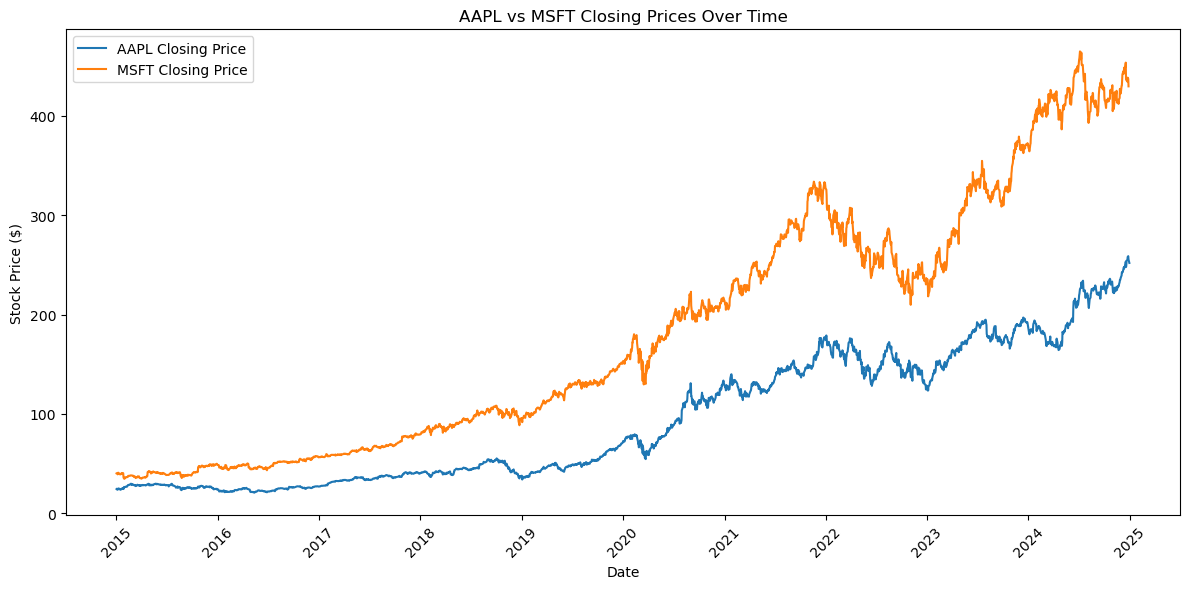

In [9]:
# Plot the Closing Price over time
# Set up the plot
plt.figure(figsize=(12,6))

# Loop through each ticker and plot
tickers = ['AAPL', 'MSFT']
for ticker in tickers:
    stock_data = df_visualization[df_visualization['Ticker'] == ticker]
    plt.plot(stock_data['Date'], stock_data['Close'], label=f"{ticker} Closing Price")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.title("AAPL vs MSFT Closing Prices Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# plt.show()

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Stock Price ($)')

Text(0.5, 1.0, 'AAPL Stock Price with 50 & 200-Day Moving Averages')

(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358., 19723., 20089.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

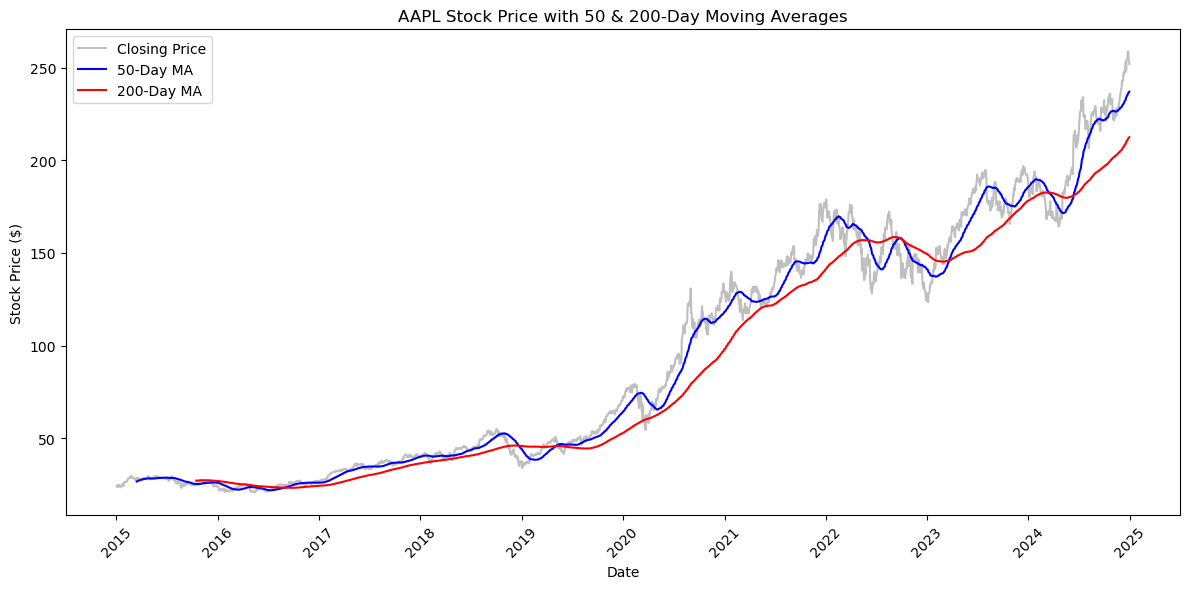

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Stock Price ($)')

Text(0.5, 1.0, 'MSFT Stock Price with 50 & 200-Day Moving Averages')

(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358., 19723., 20089.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

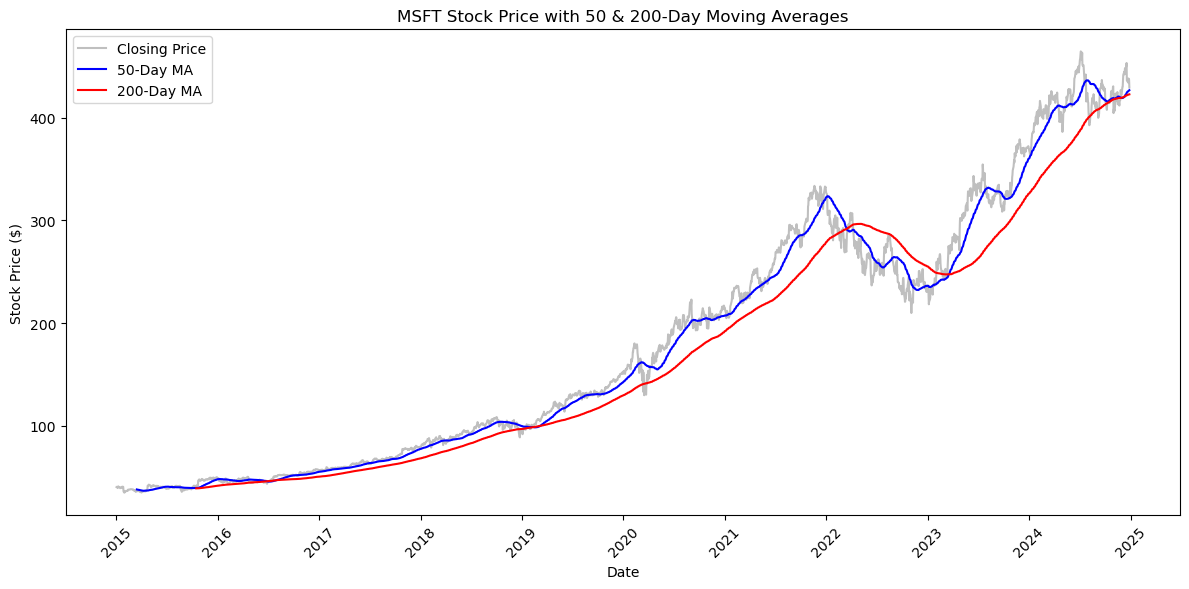

In [10]:
# Loop through each ticker and create moving average plot
for ticker in tickers:
    stock_data = df_visualization[df_visualization['Ticker'] == ticker].copy()

    # Calculate moving averages
    stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()

    # Plot
    plt.figure(figsize=(12,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label="Closing Price", color='gray', alpha=0.5)
    plt.plot(stock_data['Date'], stock_data['MA50'], label="50-Day MA", color='blue')
    plt.plot(stock_data['Date'], stock_data['MA200'], label="200-Day MA", color='red')
    plt.xlabel("Date")
    plt.ylabel("Stock Price ($)")
    plt.title(f"{ticker} Stock Price with 50 & 200-Day Moving Averages")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='Daily Change', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Daily Price Changes: AAPL')

Text(0.5, 0, 'Price Change ($)')

Text(0, 0.5, 'Frequency')

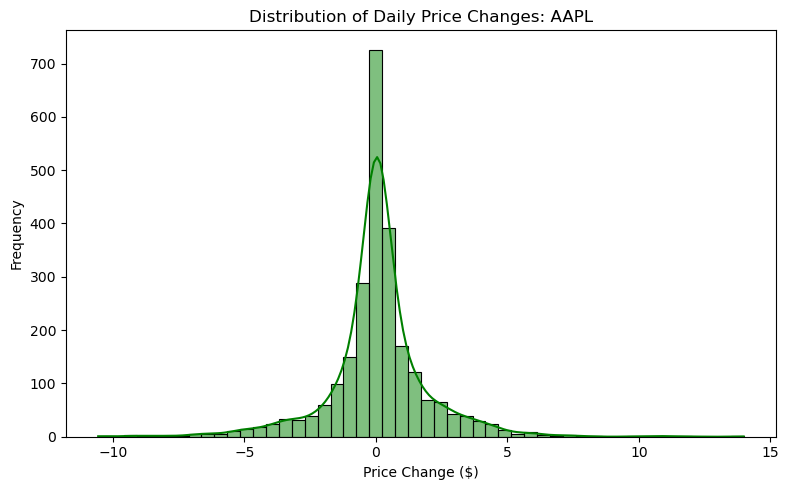

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='Daily Change', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Daily Price Changes: MSFT')

Text(0.5, 0, 'Price Change ($)')

Text(0, 0.5, 'Frequency')

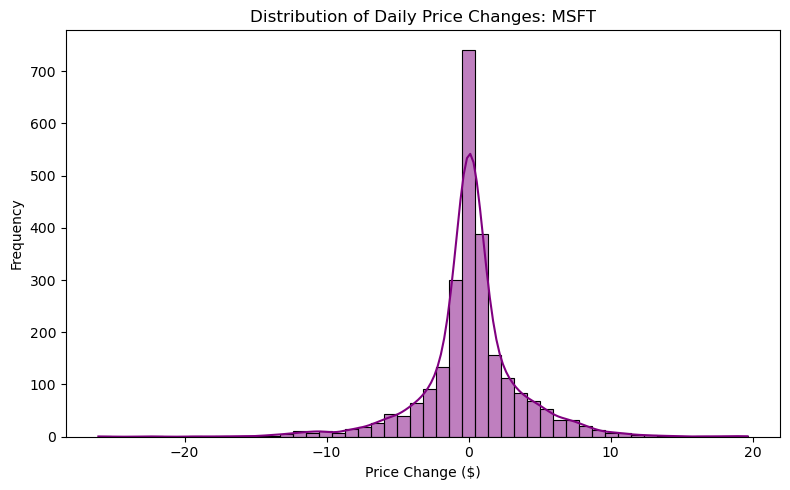

In [11]:
ticker_colors = {
    'AAPL': 'green',   # Apple → green
    'MSFT': 'purple'   # Microsoft → purple
}
# Loop through each ticker
for ticker in ticker_colors:
    stock_data = df_visualization[df_visualization['Ticker'] == ticker].copy()
    
    # Calculate daily price change
    stock_data['Daily Change'] = stock_data['Close'].diff()
    
    # Plot histogram
    plt.figure(figsize=(8,5))
    sns.histplot(stock_data['Daily Change'].dropna(), bins=50, kde=True, color=ticker_colors[ticker])
    plt.title(f"Distribution of Daily Price Changes: {ticker}")
    plt.xlabel("Price Change ($)")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

<Axes: >

Text(0.5, 1.0, 'AAPL Feature Correlation Heatmap')

<Axes: >

Text(0.5, 1.0, 'MSFT Feature Correlation Heatmap')

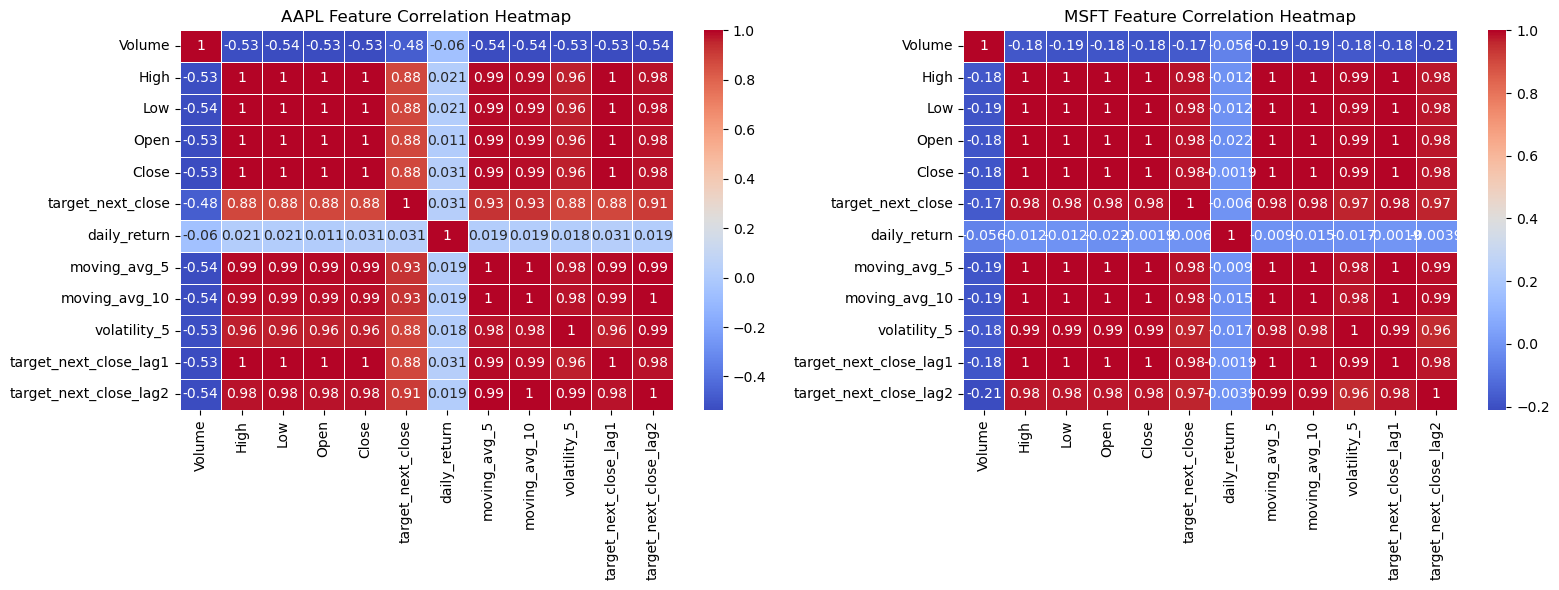

In [12]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Loop over tickers and axes
for ax, ticker in zip(axes, tickers):
    stock_data = df_visualization[df_visualization['Ticker'] == ticker].copy()
    
    # Select only numeric columns
    numeric_cols = stock_data.select_dtypes(include='number')
    
    # Compute and plot heatmap
    corr_matrix = numeric_cols.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)
    ax.set_title(f"{ticker} Feature Correlation Heatmap")

plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'MSFT Closing Prices')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Price')

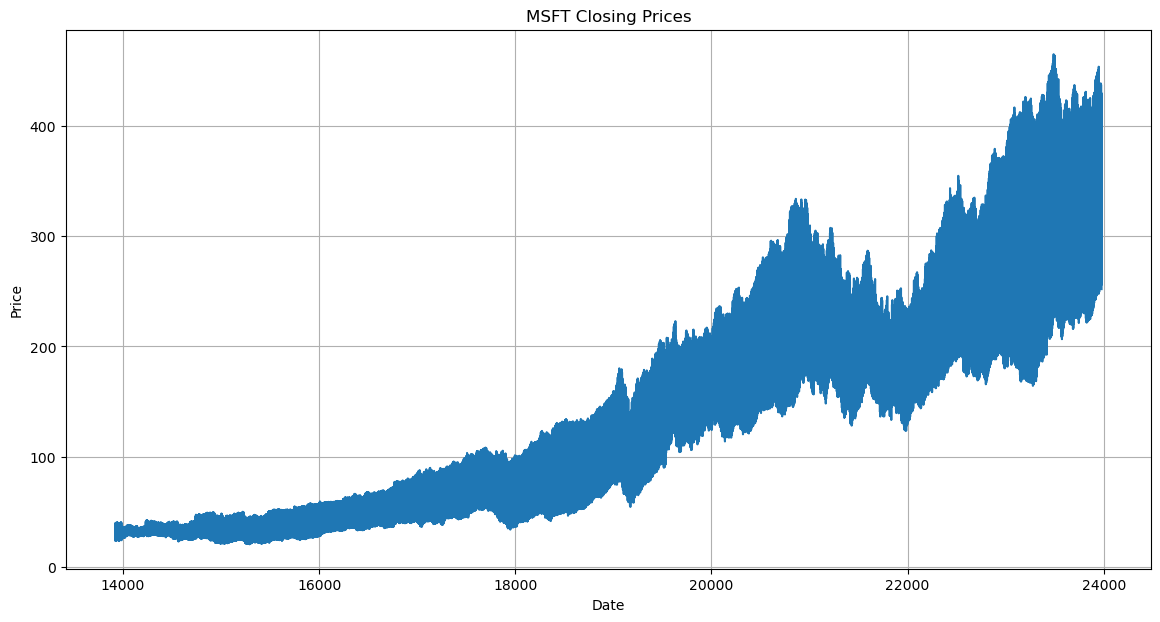

In [13]:
# Plot the closing prices
plt.figure(figsize=(14, 7))
plt.plot(df_visualization['Close'])
plt.title(f'{ticker} Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'MSFT Stock Prices (OHLC)')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Price')

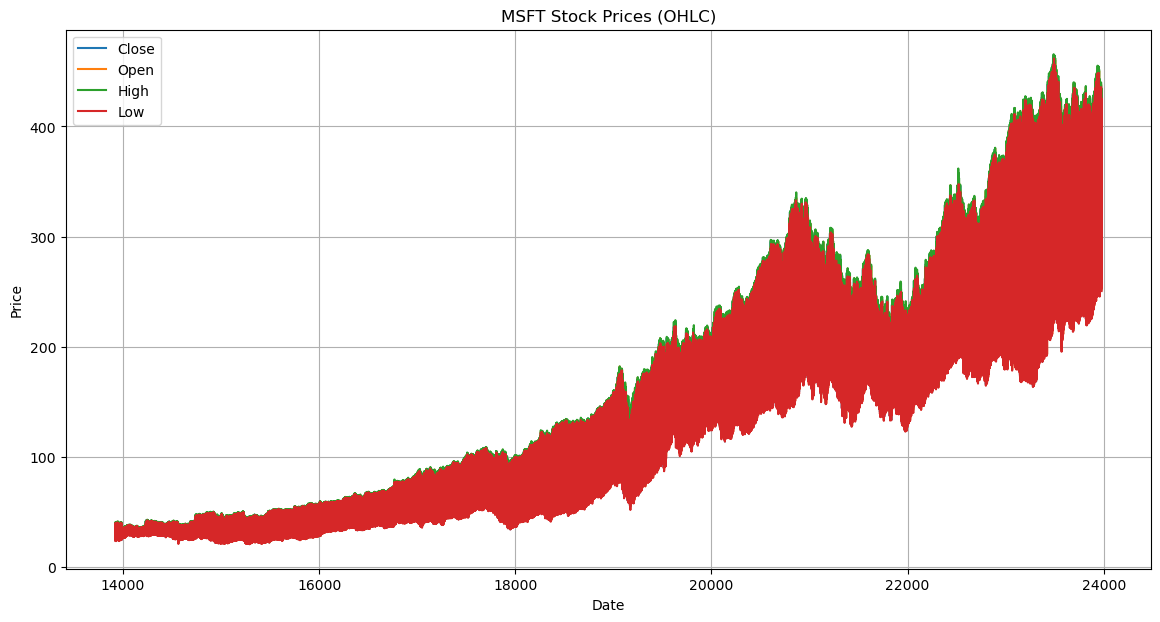

In [14]:
# Plot multiple features (e.g., Close, Open, High, Low)
plt.figure(figsize=(14,7))
plt.plot(df_visualization['Close'], label='Close')
plt.plot(df_visualization['Open'], label='Open')
plt.plot(df_visualization['High'], label='High')
plt.plot(df_visualization['Low'], label='Low')
plt.title(f'{ticker} Stock Prices (OHLC)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# Data Visualization For all five ticker 

In [15]:
df_visualization1 = df_cleaned[
    (df_cleaned['Date'] >= '2015-01-01') 
].copy()
df_visualization1.head()

,Date,Ticker,Volume,High,Low,Open,Close,target_next_close,daily_return,moving_avg_5,moving_avg_10,volatility_5,target_next_close_lag1,target_next_close_lag2
13921,2015-01-02,AAPL,212818400.0,24.789804,23.879983,24.778681,24.320435,15.426000,-0.018494,26.064519,27.814974,8.737957,24.320435,39.806458
13922,2015-01-02,AMZN,55664000.0,15.737500,15.348000,15.629000,15.426000,26.045292,-0.012989,24.238918,25.291230,9.995498,15.426000,24.320435
13923,2015-01-02,GOOG,28951268.0,26.365890,26.010056,26.253730,26.045292,40.072128,-0.007939,26.344477,25.392754,8.727440,26.045292,15.426000
13924,2015-01-02,MSFT,27913900.0,40.637731,39.883596,39.986432,40.072128,23.635279,0.002143,29.134062,27.848467,10.655560,40.072128,26.045292
13925,2015-01-05,AAPL,257142000.0,24.169158,23.448422,24.089076,23.635279,15.109500,-0.018838,25.899827,27.579624,8.919067,23.635279,40.072128


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Stock Price Trends (Close) Over Time')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Stock Price')

(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358., 19723., 20089.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

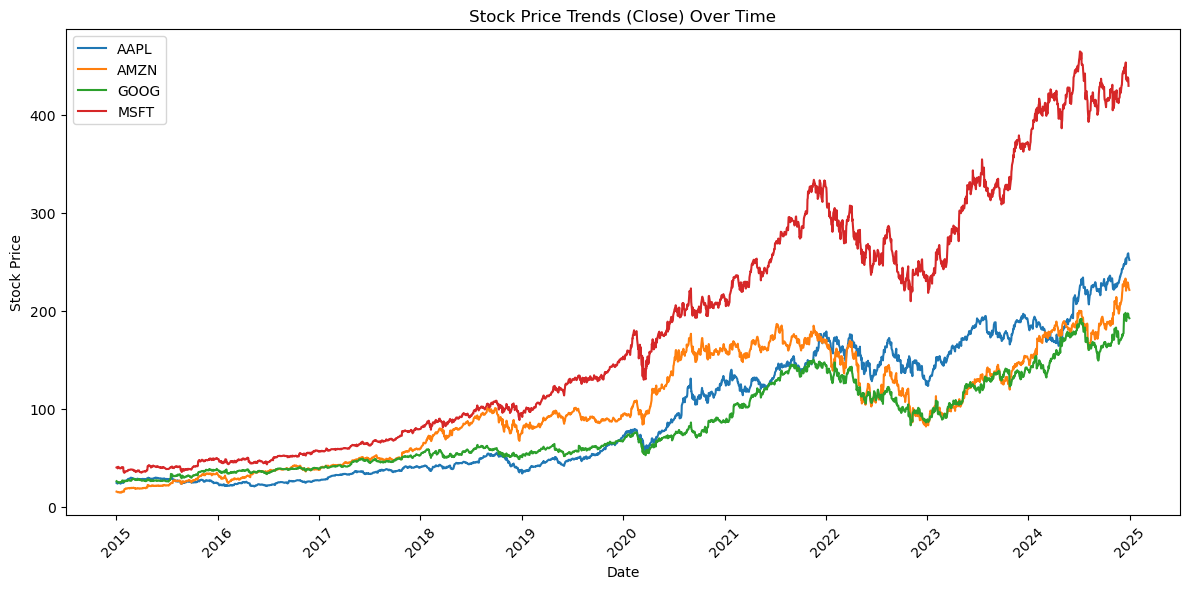

In [16]:
# Pivot data to structure it for plotting
pivot_df = df_visualization1.pivot(index='Date', columns='Ticker', values='Close')

# Plotting
plt.figure(figsize=(12, 6))
for ticker in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[ticker], label=ticker)

plt.title('Stock Price Trends (Close) Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/8w/vq_trrns7ml5vwfhcj8x1bk80000gq/T/ipykernel_35130/3355411673.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = close_prices.pct_change()


<Axes: title={'center': 'Stock Volatility (Daily Returns) Since 2015'}, xlabel='Date'>

Text(0, 0.5, 'Daily Return')

Text(0.5, 0, 'Date')

(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358., 19723., 20089.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

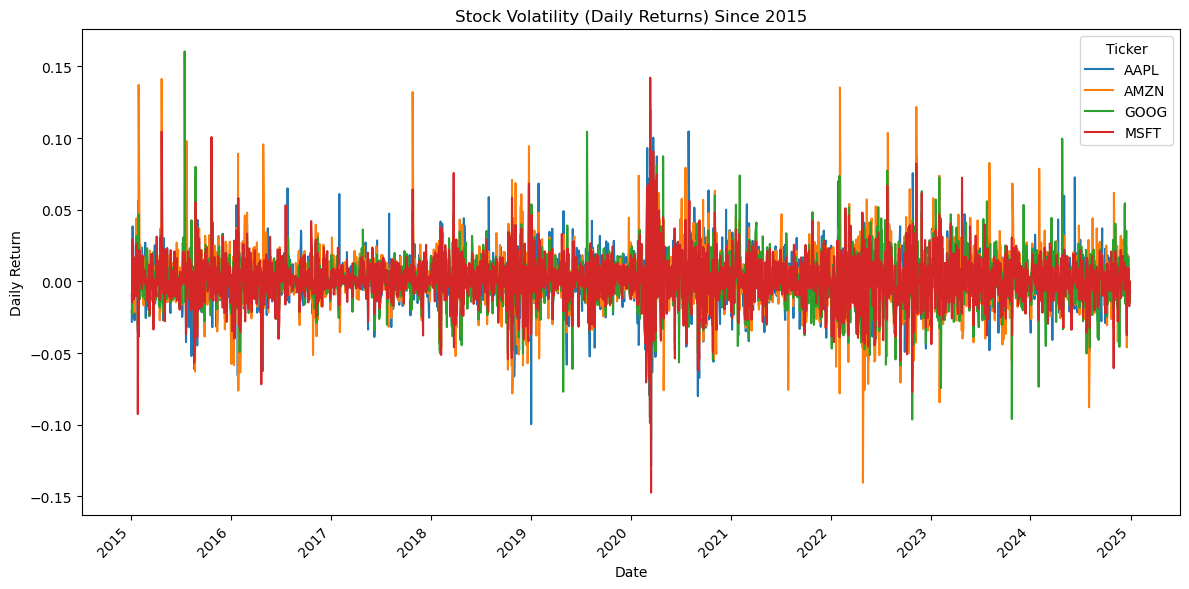

In [17]:
# Pivot to get Close prices per Ticker
close_prices = df_visualization1.pivot(index='Date', columns='Ticker', values='Close')

# Calculate daily returns (volatility)
daily_returns = close_prices.pct_change()

# Plotting volatility
daily_returns.plot(figsize=(12, 6), title="Stock Volatility (Daily Returns) Since 2015")
plt.ylabel("Daily Return")
plt.xlabel("Date")
plt.legend(title="Ticker")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Ticker', ylabel='Ticker'>

Text(0.5, 1.0, 'Stock Price Correlation')

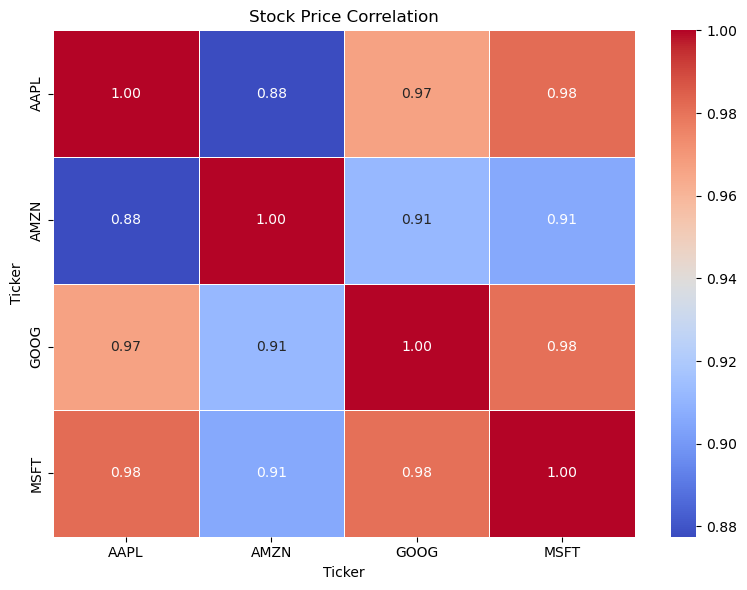

In [18]:

# Pivot to get Close prices per Ticker
close_prices = df_visualization1.pivot(index='Date', columns='Ticker', values='Close')

# Compute correlation matrix
correlation = close_prices.corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Stock Price Correlation")
plt.tight_layout()
plt.show()


/var/folders/8w/vq_trrns7ml5vwfhcj8x1bk80000gq/T/ipykernel_35130/3334567537.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rets = pivot_df.pct_change()


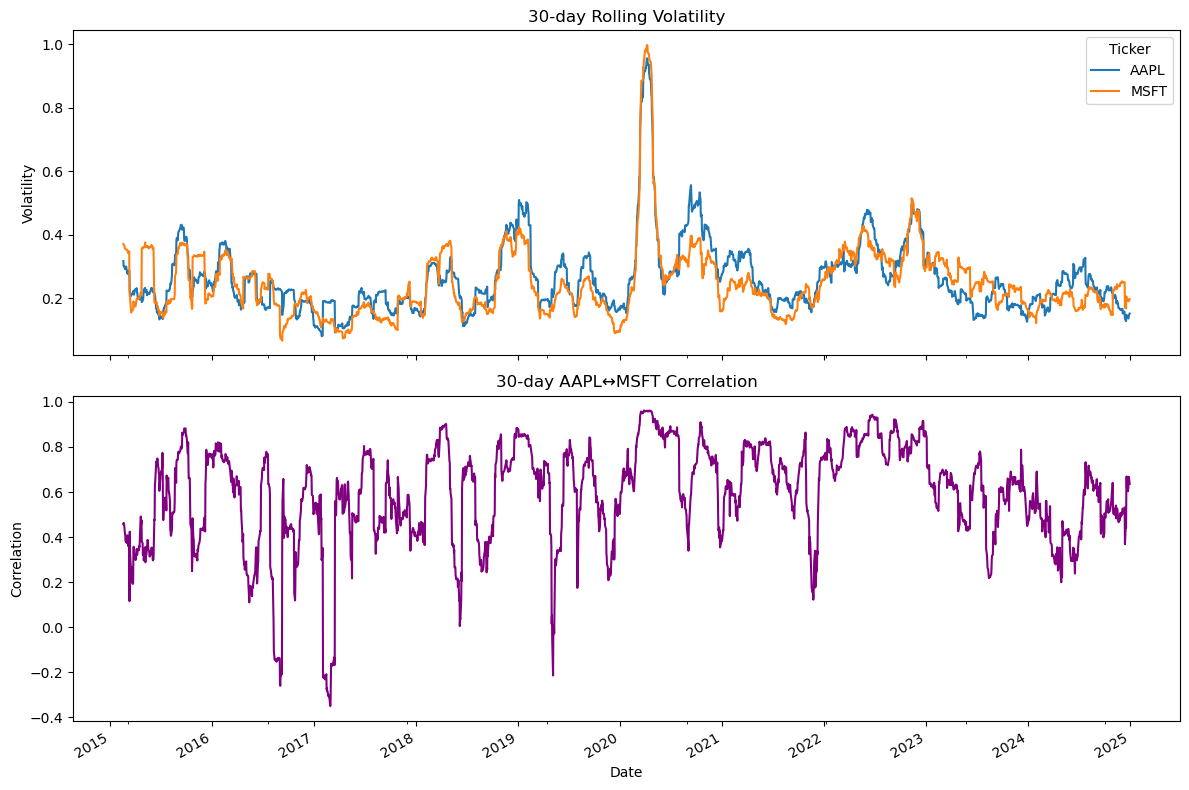

In [19]:
# Rolling Statistics & Correlations- Track how volatility and inter-ticker correlation evolve over time.

# rolling volatility (std of daily returns) and rolling correlation
window = 30  # 30 trading days

# compute daily returns pivoted
rets = pivot_df.pct_change()

# rolling vol
rolling_vol = rets.rolling(window).std() * np.sqrt(252)  # annualized

# rolling corr between AAPL & MSFT
roll_corr = rets['AAPL'].rolling(window).corr(rets['MSFT'])

# plot
fig, axes = plt.subplots(2,1, figsize=(12,8), sharex=True)
rolling_vol[['AAPL','MSFT']].plot(ax=axes[0], title="30-day Rolling Volatility"); 
axes[0].set_ylabel("Volatility")
roll_corr.plot(ax=axes[1], color='purple', title="30-day AAPL↔MSFT Correlation")
axes[1].set_ylabel("Correlation")
plt.tight_layout();


<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'AAPL Annualized 30-Day Rolling Volatility')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Volatility (σ)')

(array([ 9496., 10957., 12418., 13879., 15340., 16801., 18262., 19723.,
        21184.]),
 [Text(9496.0, 0, '1996'),
  Text(10957.0, 0, '2000'),
  Text(12418.0, 0, '2004'),
  Text(13879.0, 0, '2008'),
  Text(15340.0, 0, '2012'),
  Text(16801.0, 0, '2016'),
  Text(18262.0, 0, '2020'),
  Text(19723.0, 0, '2024'),
  Text(21184.0, 0, '2028')])

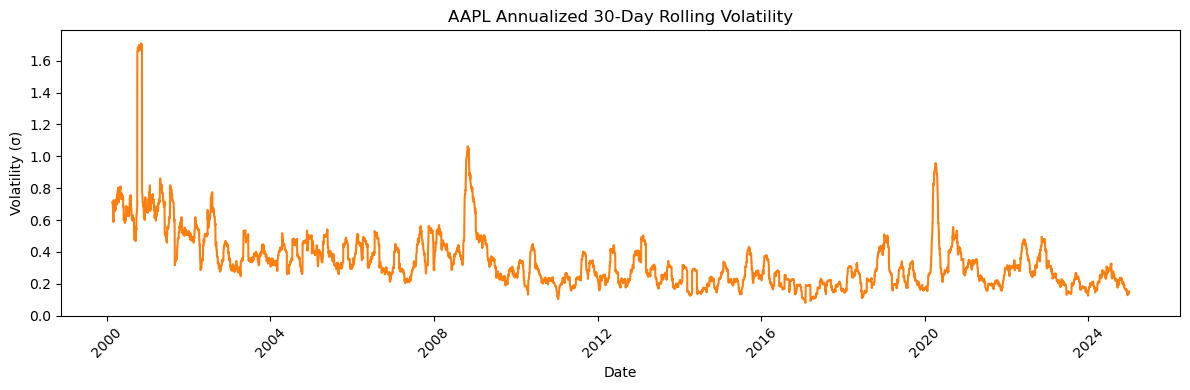

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'MSFT Annualized 30-Day Rolling Volatility')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Volatility (σ)')

(array([ 9496., 10957., 12418., 13879., 15340., 16801., 18262., 19723.,
        21184.]),
 [Text(9496.0, 0, '1996'),
  Text(10957.0, 0, '2000'),
  Text(12418.0, 0, '2004'),
  Text(13879.0, 0, '2008'),
  Text(15340.0, 0, '2012'),
  Text(16801.0, 0, '2016'),
  Text(18262.0, 0, '2020'),
  Text(19723.0, 0, '2024'),
  Text(21184.0, 0, '2028')])

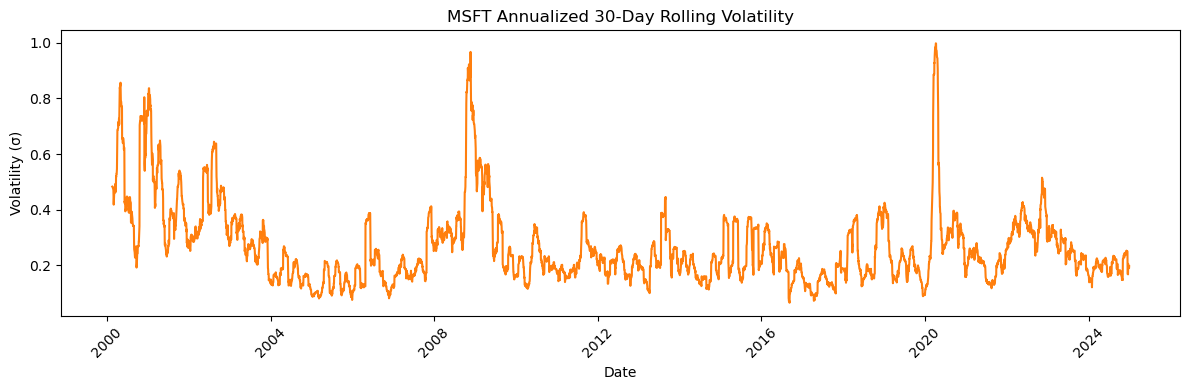

In [21]:
# Rolling 30-day Volatility (Annualized) - Compute σ of returns over a 30-day window, scaled to an annual basis.

for ticker in tickers:
    data = df_cleaned[df_cleaned['Ticker'] == ticker].copy()
    data = data.sort_values('Date')
    data['Daily Return'] = data['Close'].pct_change()
    data['Vol30_Annualized'] = data['Daily Return'].rolling(30).std() * np.sqrt(252)
    
    plt.figure(figsize=(12,4))
    plt.plot(data['Date'], data['Vol30_Annualized'], color='tab:orange')
    plt.title(f'{ticker} Annualized 30-Day Rolling Volatility')
    plt.xlabel('Date'); plt.ylabel('Volatility (σ)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Figure size 1200x400 with 0 Axes>

<Axes: xlabel='Month', ylabel='Daily Return'>

Text(0.5, 1.0, 'AAPL Distribution of Daily Returns by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Daily Return')

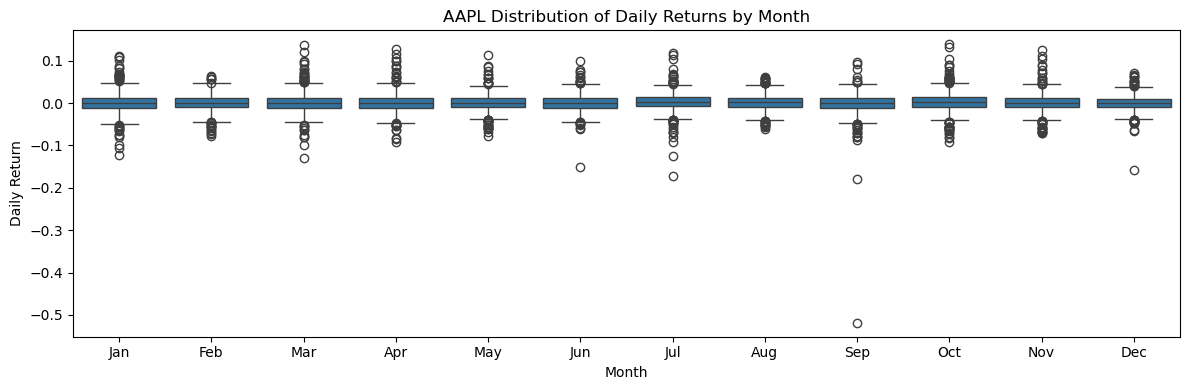

<Figure size 1200x400 with 0 Axes>

<Axes: xlabel='Month', ylabel='Daily Return'>

Text(0.5, 1.0, 'MSFT Distribution of Daily Returns by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Daily Return')

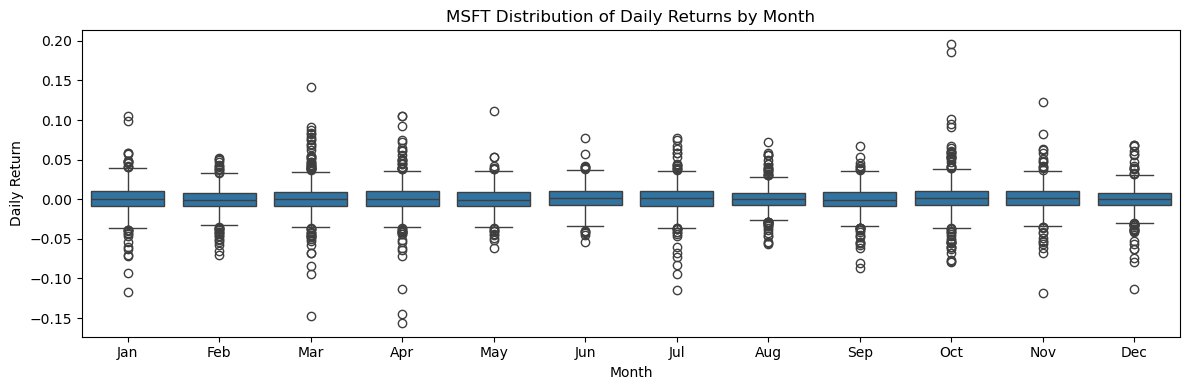

In [22]:
# Distribution of Monthly Returns (Boxplot)- which months tend to be “good” or “bad.”

for ticker in tickers:
    data = df_cleaned[df_cleaned['Ticker'] == ticker].copy()
    data = data.sort_values('Date')
    data['Daily Return'] = data['Close'].pct_change()
    data['Month'] = data['Date'].dt.month_name().str[:3]   # e.g. “Jan”, “Feb”
    
    plt.figure(figsize=(12,4))
    sns.boxplot(x='Month', y='Daily Return', data=data, order=[
        'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
    ])
    plt.title(f'{ticker} Distribution of Daily Returns by Month')
    plt.xlabel('Month'); plt.ylabel('Daily Return')
    plt.tight_layout()
    plt.show()


/var/folders/8w/vq_trrns7ml5vwfhcj8x1bk80000gq/T/ipykernel_35130/1344586159.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = close_pivot.pct_change().dropna()


<Figure size 600x500 with 0 Axes>

<Axes: xlabel='Ticker', ylabel='Ticker'>

Text(0.5, 1.0, 'Correlation of Daily Returns (AAPL, MSFT, AMZN, GOOG)')

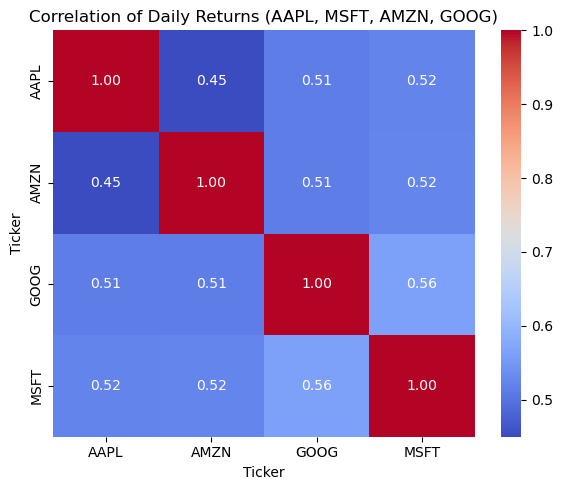

In [23]:
# Correlation of Daily Returns Across All Four Stocks- to see how they move together:

# pivot to wide
close_pivot = df_cleaned.pivot(index='Date', columns='Ticker', values='Close')
returns = close_pivot.pct_change().dropna()

plt.figure(figsize=(6,5))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Daily Returns (AAPL, MSFT, AMZN, GOOG)')
plt.tight_layout()
plt.show()
